In [1]:
include("install_pkg.jl")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  99.9 %0.0 %Fetching: [=====>                                   ]  11.0 %Fetching: [=====>                                   ]  12.2 %Fetching: [======>                                  ]  12.7 %Fetching: [=======>                                 ]  15.3 %Fetching: [=======>                                 ]  16.4 %Fetching: [========>                                ]  19.2 %Fetching: [=============>                           ]  32.2 %Fetching: [================>                        ]  38.8 %Fetching: [====================>                    ]  49.4 %Fetching: [=========================>               ]  60.4 %Fetching: [==========================>              ]  63.7 %Fetching: [==========================>              ]  64.7 %Fetching: [===========================>             ]  66.1 %Fetching: [========

In [1]:
include("src/main.jl")

using ProgressBars
using HDF5, JLD
using DelimitedFiles
using Dates
using ProfileView
using Profile


Id = SparseArrays.I

┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/ayedm/.julia/packages/PyPlot/4wzW1/src/init.jl:192


LinearAlgebra.UniformScaling{Bool}
true*I

In [86]:
results_folder = "results/data_for_kn_very_large/fixed sigma"

#results_folder = "results/data_for_kn_small/free sigma"
#results_folder = "results/data_sbm_600/fixed sigma"

#results_folder = "results/sbm_1200/fixed sigma"
#results_folder = "results/amazon_10000/free sigma"

chains_names = first(walkdir(results_folder))[2]

3-element Array{String,1}:
 "13-06-20_18-28-06"
 "13-06-20_18-28-46"
 "13-06-20_18-28-52"

In [87]:
# Load variables of each chain

n_active_list = Dict()
kappa_list = Dict()
sigma_list = Dict()
tau_list = Dict()
alpha_list = Dict()
beta_list = Dict()

M = length(chains_names)
for m in 1:M
  load_dir = string(results_folder,"/",chains_names[m],"/variables/")
  variables = load(string(load_dir,"variables.jld"))
  n_active_list[m] = variables["n_active_list"]
  kappa_list[m] = variables["kappa_list"]
  sigma_list[m] = variables["sigma_list"]
  tau_list[m] = variables["tau_list"]
  alpha_list[m] = variables["alpha_list"]
  beta_list[m] = variables["beta_list"]
end

In [88]:
load_dir = string(results_folder,"/",chains_names[1],"/variables/")
variables = load(string(load_dir,"variables.jld"))

Dict{String,Any} with 15 entries:
  "skip"             => 50
  "n_iter"           => 5000
  "ind_clusterings"  => [2750, 3000, 3250, 3500, 3750, 4000, 4250, 4500, 4750, …
  "prop_params"      => Dict{Any,Any}("sigma"=>0.04,"alpha"=>0.04,"kappa"=>0.04…
  "tau_list"         => [2.59652, 1.52651, 2.6876, 2.67301, 4.80119, 5.92353, 3…
  "alpha_list"       => [0.0689911, 0.0646828, 0.067867, 0.0665561, 0.0667096, …
  "partition_"       => Dict(4=>…
  "sentAndReceived_" => Dict(4=>[0, 2, 45, 0, 0, 37, 0, 0, 8, 108  …  0, 2, 0, …
  "beta_list"        => [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5  …  0…
  "sigma_list"       => [-0.184894, -0.265414, -0.367911, -0.278703, -0.298479,…
  "clusterings"      => [5 2 … 4 5; 4 4 … 4 4; … ; 6 5 … 5 5; 2 2 … 2 2]
  "prior_params"     => Dict{Any,Any}("sigma"=>(1.0, 1.0),"alpha"=>(0.1, 1.0),"…
  "kappa_list"       => [2.72797, 3.14524, 9.12064, 2.79188, 9.77666, 3.91987, …
  "activities_list"  => [73.7275 50.0211 … 12.5368 9.52888; 106.172 51.102

In [89]:
# Make sure that all chains have same number of iterations
T = length(n_active_list[1])
print(string("All chains have ", T, " iterations = ",
            all([T == length(chain) for chain in values(n_active_list)])))

All chains have 5000 iterations = true

In [90]:
# Concatenate values after burn
burn = Int(T/2)

kn_array = vcat([chain[burn:T] for chain in values(n_active_list)]...);
sigma_array = vcat([chain[burn:T] for chain in values(sigma_list)]...);
alpha_array = vcat([chain[burn:T] for chain in values(alpha_list)]...);
tau_array = vcat([chain[burn:T] for chain in values(tau_list)]...);

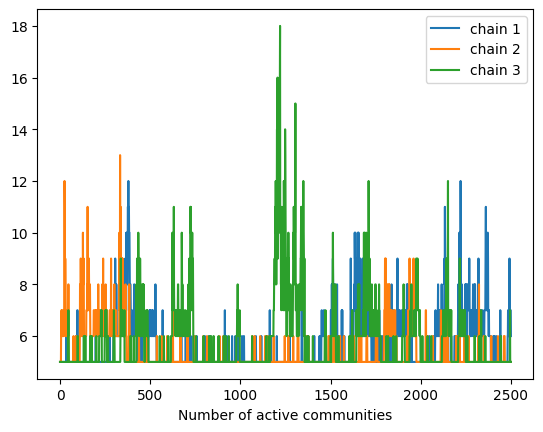

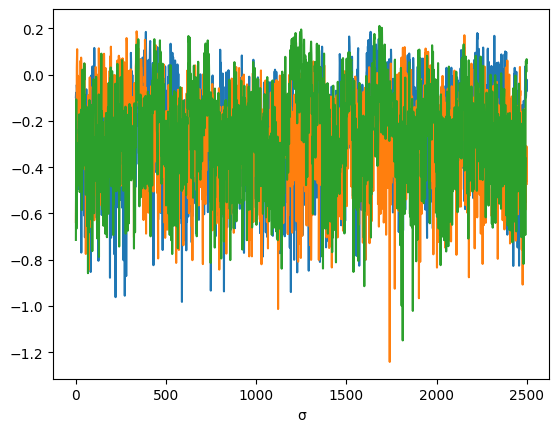

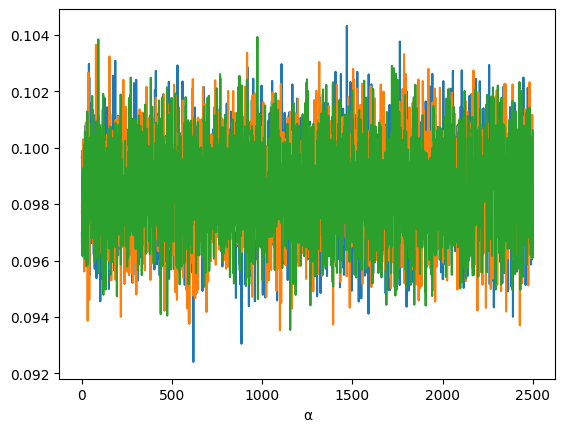

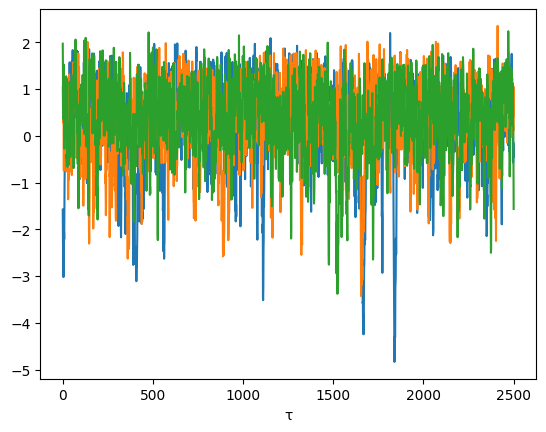

PyObject Text(0.5, 24.0, 'τ')

In [91]:
PyPlot.figure(figsize=(6.40,4.80))


for (m, chain) in enumerate(values(n_active_list))
    PyPlot.plot(chain[burn:T], label="chain $m")
end
PyPlot.legend()
PyPlot.xlabel("Number of active communities")

PyPlot.figure(figsize=(6.40,4.80))
for chain in values(sigma_list)
    PyPlot.plot(chain[burn:T])
end
PyPlot.xlabel("σ")

PyPlot.figure(figsize=(6.40,4.80))
for chain in values(alpha_list)
    PyPlot.plot(chain[burn:T])
end
PyPlot.xlabel("α")

PyPlot.figure(figsize=(6.40,4.80))
for chain in values(tau_list)
    PyPlot.plot(log.(chain[burn:T]))
end
PyPlot.xlabel("τ")



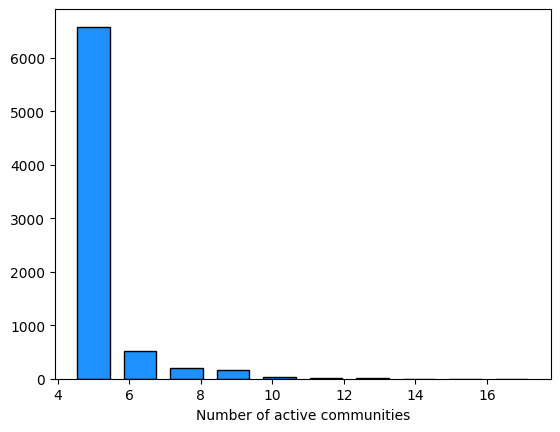

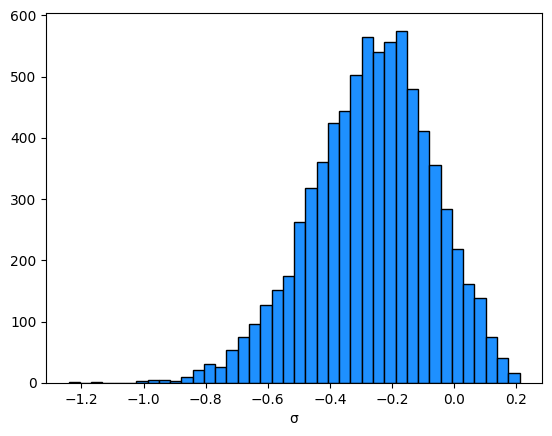

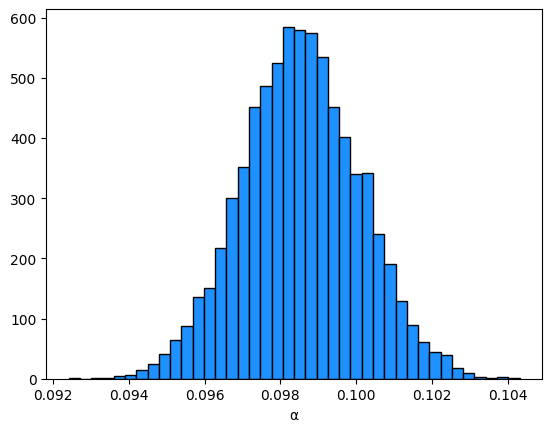

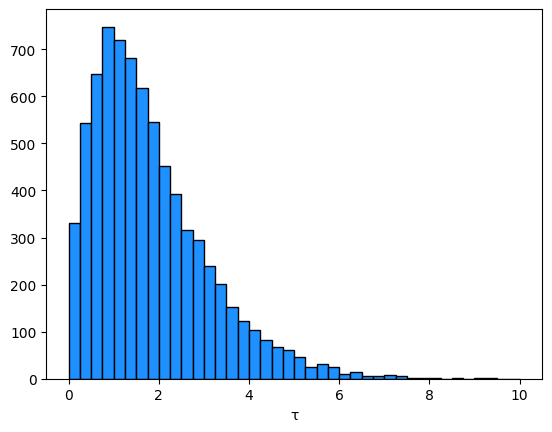

Probability of sigma negative = 0.9197654271624683


PyObject Text(0.5, 24.0, 'τ')

In [92]:
# Plot histograms
# Amazon

println(string("Probability of sigma negative = ", sum(sigma_array .< 0)/length(sigma_array)))
PyPlot.figure(figsize=(6.40,4.80))
#PyPlot.ylim((0,2800))
PyPlot.hist(kn_array,
            #range=(4,14),
            edgecolor="black",
            align="left",
            facecolor="dodgerblue",
            rwidth=0.7);
PyPlot.xlabel("Number of active communities")


PyPlot.figure(figsize=(6.40,4.80))
#PyPlot.ylim((0,300))
PyPlot.hist(sigma_array,
            #range=(-1,0.5),
            bins=40,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue")
            #rwidth=0.7);
PyPlot.xlabel("σ")

PyPlot.figure(figsize=(6.40,4.80))
#PyPlot.ylim((0,1200))
PyPlot.hist(alpha_array,
            #range=(0.07,0.13),
            bins=40,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue")
            #rwidth=0.7);
PyPlot.xlabel("α")

PyPlot.figure(figsize=(6.40,4.80))
#PyPlot.ylim((0,1200))
PyPlot.hist(tau_array,
            range=(0.,10.),
            bins=40,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue")
            #rwidth=0.7);
PyPlot.xlabel("τ")

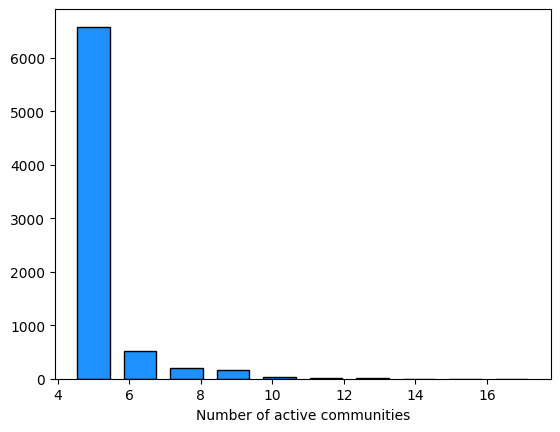

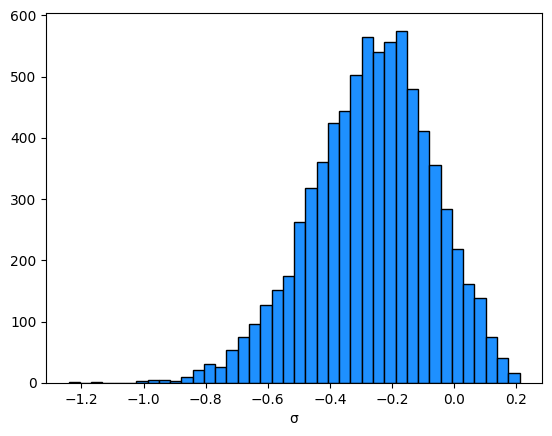

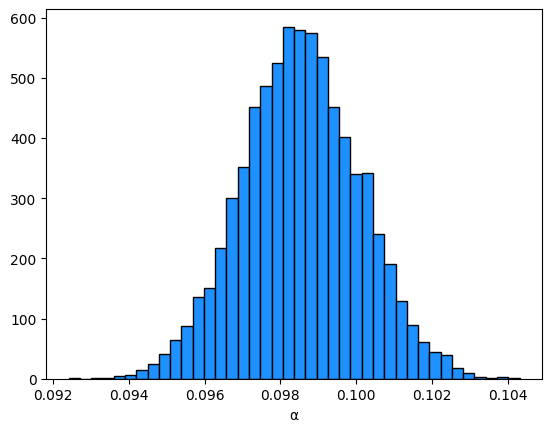

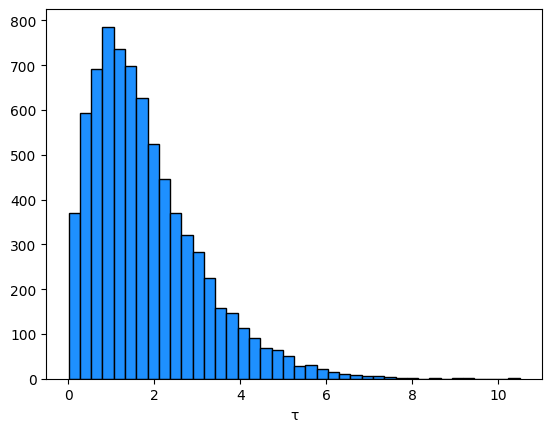

Mean and variance of the posterior Kn = (5.538184726109556, 1.1731285091934973)
95% credible region of the posterior Kn = (5.0, 8.0)


In [93]:
# Plot histograms
# Small

PyPlot.figure(figsize=(6.40,4.80))
#PyPlot.ylim((0,2800))
PyPlot.hist(kn_array,
            #range=(4,14),
            edgecolor="black",
            align="left",
            facecolor="dodgerblue",
            rwidth=0.7);
PyPlot.xlabel("Number of active communities")


PyPlot.figure(figsize=(6.40,4.80))
#PyPlot.ylim((0,300))
PyPlot.hist(sigma_array,
            #range=(-1,0.5),
            bins=40,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue")
            #rwidth=0.7);
PyPlot.xlabel("σ")

PyPlot.figure(figsize=(6.40,4.80))
#PyPlot.ylim((0,1200))
PyPlot.hist(alpha_array,
            #range=(0.07,0.13),
            bins=40,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue")
            #rwidth=0.7);
PyPlot.xlabel("α")

PyPlot.figure(figsize=(6.40,4.80))
#PyPlot.ylim((0,1200))
PyPlot.hist(tau_array,
            #range=(0.,10.),
            bins=40,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue")
            #rwidth=0.7);
PyPlot.xlabel("τ")

println(string("Mean and variance of the posterior Kn = (",
            mean(kn_array), ", ",
            var(kn_array), ")") )

println(string("95% credible region of the posterior Kn = (",
            quantile(kn_array, 0.0), ", ",
            quantile(kn_array, 0.95), ")") )

In [173]:
# Analysis of clusterings
# Load variables of each chain

clusterings_list = Dict()

M = length(chains_names)
for m in 1:M
  load_dir = string(results_folder,"/",chains_names[m],"/variables/")
  variables = load(string(load_dir,"variables.jld"))
  clusterings_list[m] = variables["clusterings"]
end

In [174]:
# Analysis of clusterings for the data_sbm_600 dataset

using StatsBase
clusterings = hcat(clusterings_list[1], clusterings_list[2])
cl_sizes = [length(unique(clusterings[:,c])) for c in range(1,20)]
small_val_list = []
large_val_list = []
prop_list = []

for c in range(1,20)
    unique_val = collect(values(countmap(clusterings[:,c])))
    small_val = unique_val[unique_val .< 170]
    large_val = unique_val[unique_val .>= 170]
    prop_list = vcat(prop_list, [sum(small_val)/600])
    small_val_list = vcat(small_val_list, small_val)
    large_val_list = vcat(large_val_list, large_val)
end

┌ Warning: `range(start, stop)` (with neither `length` nor `step` given) is deprecated, use `range(start, stop=stop)` instead.
│   caller = top-level scope at In[174]:5
└ @ Core In[174]:5
┌ Warning: `range(start, stop)` (with neither `length` nor `step` given) is deprecated, use `range(start, stop=stop)` instead.
│   caller = top-level scope at In[174]:9
└ @ Core ./In[174]:9


In [154]:
sqrt.([1.84, 1.35, 1.58])

3-element Array{Float64,1}:
 1.3564659966250536
 1.161895003862225 
 1.2569805089976536

In [131]:
# Confusion matrix
comm1, comm2, comm3 = zeros(600), zeros(600), zeros(600)

comm1[1:200] .= 1 
comm2[201:400] .= 1
comm3[401:600] .= 1

est_comm1_idx = zeros(Int64, 20)
est_comm2_idx = zeros(Int64, 20)
est_comm3_idx = zeros(Int64, 20)

for c in range(1, 20)
    cls = clusterings[:,c]
    for k in collect(unique(cls)) 
        if sum(comm1 .* (cls .== k)) > 150
            if est_comm1_idx[c] > 0; error(); end
            est_comm1_idx[c] = k
        end
        if sum(comm2 .* (cls .== k)) > 150
            if est_comm2_idx[c] > 0; error(); end
            est_comm2_idx[c] = k
        end
        if sum(comm3 .* (cls .== k)) > 150
            if est_comm3_idx[c] > 0; error(); end
            est_comm3_idx[c] = k
        end
    end
end

┌ Warning: `range(start, stop)` (with neither `length` nor `step` given) is deprecated, use `range(start, stop=stop)` instead.
│   caller = top-level scope at In[131]:11
└ @ Core ./In[131]:11


In [150]:
confusion = zeros((3,4))

for c in range(1,20)
    cls = clusterings[:, c]
    
    cl1 = (cls .== est_comm1_idx[c])
    cl2 = (cls .== est_comm2_idx[c])
    cl3 = (cls .== est_comm3_idx[c])
    
    confusion[1, 1] += sum(comm1 .* cl1)
    confusion[1, 2] += sum(comm1 .* cl2)
    confusion[1, 3] += sum(comm1 .* cl3)
    
    confusion[2, 1] += sum(comm2 .* cl1)
    confusion[2, 2] += sum(comm2 .* cl2)
    confusion[2, 3] += sum(comm2 .* cl3)
    
    confusion[3, 1] += sum(comm3 .* cl1)
    confusion[3, 2] += sum(comm3 .* cl2)
    confusion[3, 3] += sum(comm3 .* cl3)
end

confusion ./= 20
    
confusion[:, 4] = (200 .- sum(confusion, dims=2))
confusion/200

┌ Warning: `range(start, stop)` (with neither `length` nor `step` given) is deprecated, use `range(start, stop=stop)` instead.
│   caller = top-level scope at In[150]:2
└ @ Core ./In[150]:2


3×4 Array{Float64,2}:
 0.9745  0.0005  0.00125  0.02375
 0.0005  0.9805  0.0      0.019  
 0.001   0.0005  0.97275  0.02575

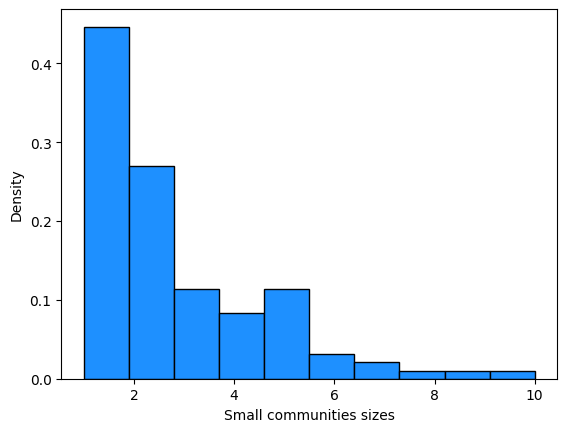

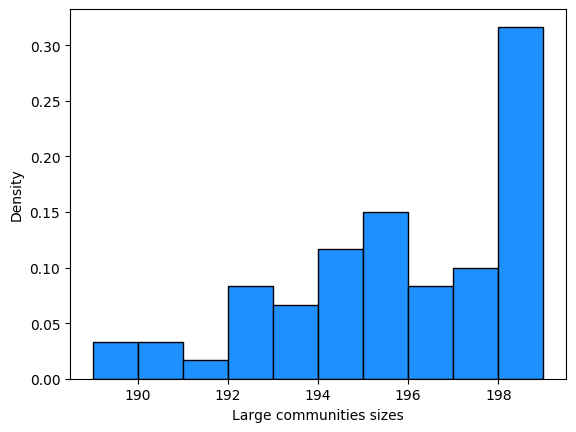

PyObject Text(24.000000000000007, 0.5, 'Density')

In [111]:
PyPlot.figure(figsize=(6.40,4.80))
PyPlot.hist(small_val_list,
            #range=(0.07,0.13),
            bins=10,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue",
            density=true)
            #rwidth=0.7);
PyPlot.xlabel("Small communities sizes")
PyPlot.ylabel("Density")
PyPlot.savefig("Density of small communities.png")

PyPlot.figure(figsize=(6.40,4.80))
PyPlot.hist(large_val_list,
            #range=(0.07,0.13),
            bins=10,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue",
            density=true)
            #rwidth=0.7);
PyPlot.xlabel("Large communities sizes")
PyPlot.ylabel("Density")

In [110]:
mean(large_val_list)

195.43333333333334

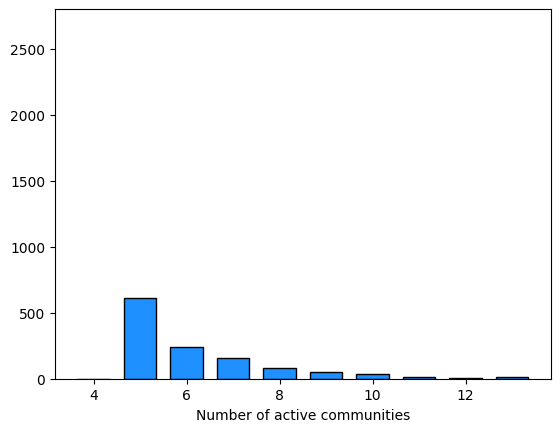

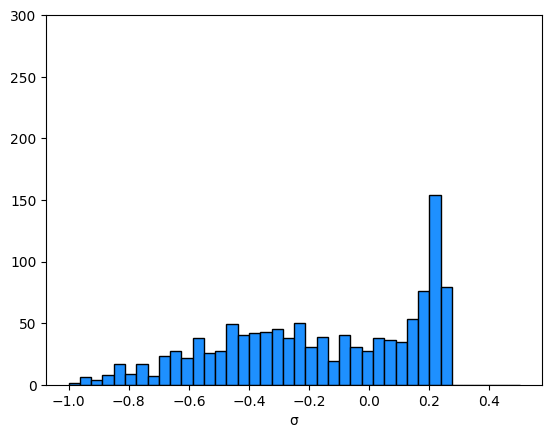

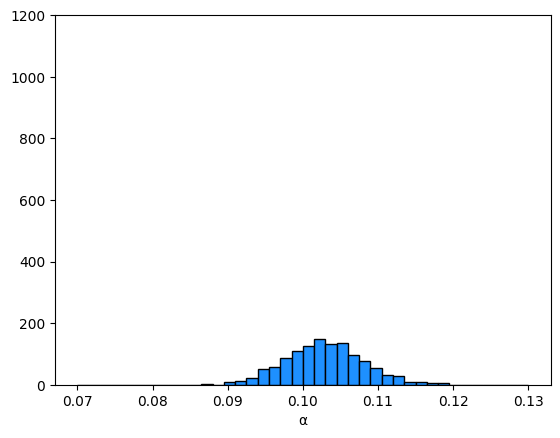

PyObject Text(0.5, 24.0, 'α')

In [81]:
# Plot histograms
# Medium

PyPlot.figure(figsize=(6.40,4.80))
PyPlot.ylim((0,2800))
PyPlot.hist(kn_array,
            range=(4,14),
            edgecolor="black",
            align="left",
            facecolor="dodgerblue",
            rwidth=0.7);
PyPlot.xlabel("Number of active communities")


PyPlot.figure(figsize=(6.40,4.80))
PyPlot.ylim((0,300))
PyPlot.hist(sigma_array,
            range=(-1,0.5),
            bins=40,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue")
            #rwidth=0.7);
PyPlot.xlabel("σ")

PyPlot.figure(figsize=(6.40,4.80))
PyPlot.ylim((0,1200))
PyPlot.hist(alpha_array,
            range=(0.07,0.13),
            bins=40,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue")
            #rwidth=0.7);
PyPlot.xlabel("α")

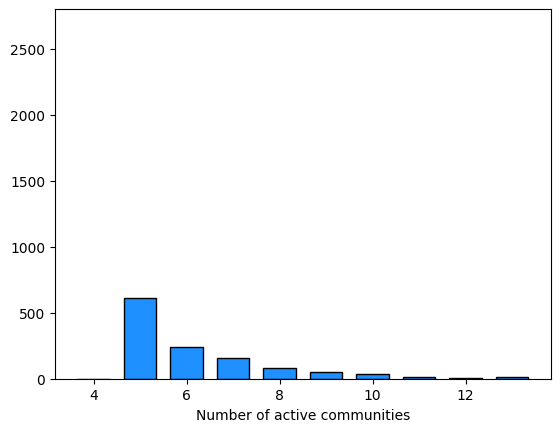

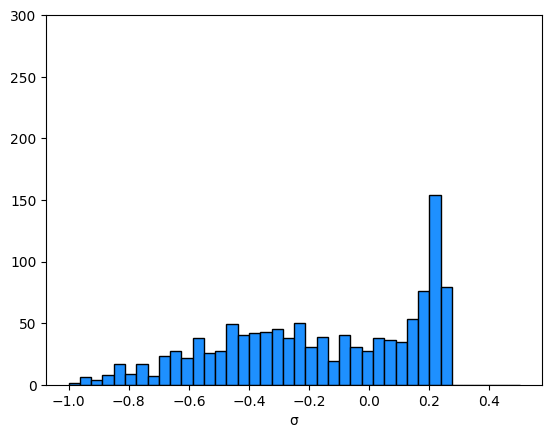

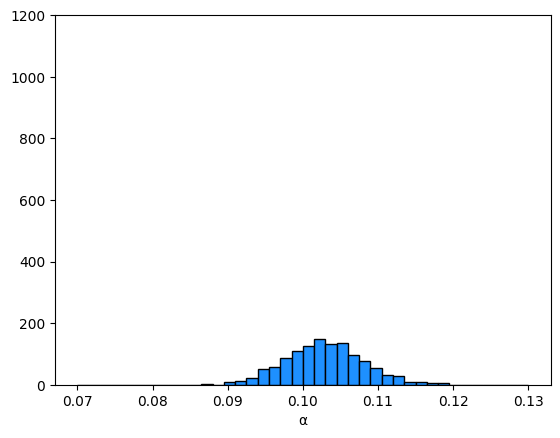

PyObject Text(0.5, 24.0, 'α')

In [82]:
# Plot histograms
# Large

PyPlot.figure(figsize=(6.40,4.80))
PyPlot.ylim((0,2800))
PyPlot.hist(kn_array,
            range=(4,14),
            edgecolor="black",
            align="left",
            facecolor="dodgerblue",
            rwidth=0.7);
PyPlot.xlabel("Number of active communities")


PyPlot.figure(figsize=(6.40,4.80))
PyPlot.ylim((0,300))
PyPlot.hist(sigma_array,
            range=(-1,0.5),
            bins=40,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue")
            #rwidth=0.7);
PyPlot.xlabel("σ")

PyPlot.figure(figsize=(6.40,4.80))
PyPlot.ylim((0,1200))
PyPlot.hist(alpha_array,
            range=(0.07,0.13),
            bins=40,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue")
            #rwidth=0.7);
PyPlot.xlabel("α")